<a href="https://colab.research.google.com/github/Bellahmer-hacene/ML/blob/master/zillow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/dataset/df.csv')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

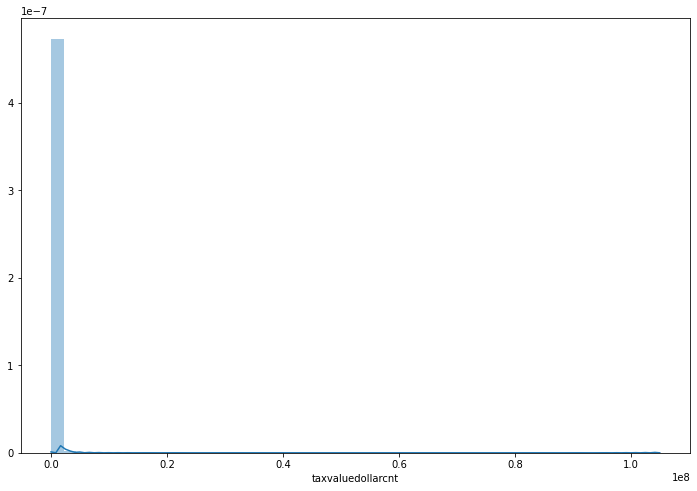

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['taxvaluedollarcnt'])

In [ ]:
len(df)*(0.05)

8289.45

In [ ]:
df = df.sort_values('taxvaluedollarcnt',ascending=False).iloc[8290:]

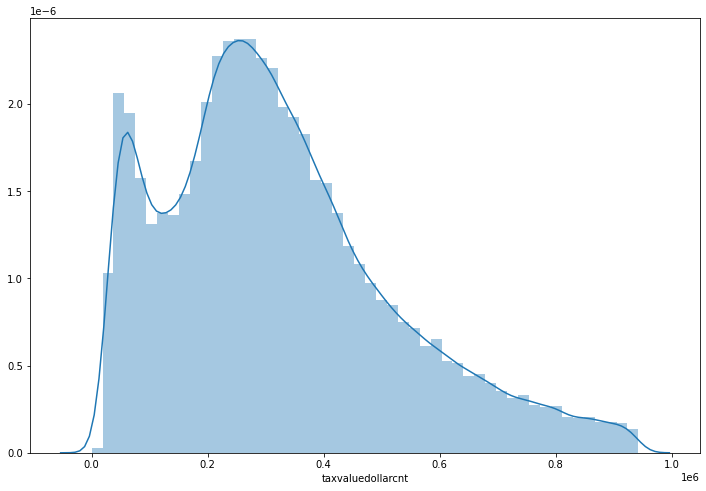

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['taxvaluedollarcnt'])

In [ ]:
X = df.drop('taxvaluedollarcnt',axis=1).values
y = df['taxvaluedollarcnt'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.shape

(157499, 510)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(units=509, activation='relu', input_shape=(509, ))) # Hidden 1
model.add(Dense(170, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
3692/3692 - 16s - loss: 10172686336.0000 - val_loss: 30286080.0000
Epoch 2/1000
3692/3692 - 16s - loss: 22968900.0000 - val_loss: 14097567.0000
Epoch 3/1000
3692/3692 - 16s - loss: 7595785.0000 - val_loss: 5310391.0000
Epoch 4/1000
3692/3692 - 16s - loss: 4131874.7500 - val_loss: 3000834.2500
Epoch 5/1000
3692/3692 - 16s - loss: 3402850.7500 - val_loss: 3808342.7500
Epoch 6/1000
3692/3692 - 16s - loss: 3442694.5000 - val_loss: 2327742.5000
Epoch 7/1000
3692/3692 - 16s - loss: 3266467.7500 - val_loss: 2403610.7500
Epoch 8/1000
3692/3692 - 17s - loss: 3147257.2500 - val_loss: 1272030.0000
Epoch 9/1000
3692/3692 - 17s - loss: 3088733.2500 - val_loss: 2352092.5000
Epoch 10/1000
3692/3692 - 17s - loss: 2802901.7500 - val_loss: 2580360.2500
Epoch 11/1000
3692/3692 - 16s - loss: 2796493.2500 - val_loss: 6106843.0000
Epoch 12/1000
3692/3692 - 16s - loss: 2692085.7500 - val_loss: 3448222.0000
Epoch 13/1000
Restoring model weights from the end of the best epoch.
3692/3692 - 16s - lo

<Figure size 864x576 with 0 Axes>

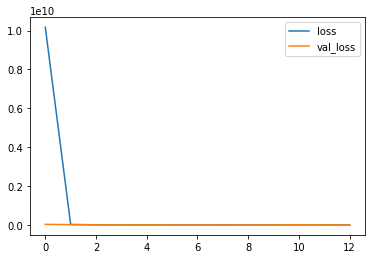

In [ ]:
plt.figure(figsize=(12,8))
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
MAE = mean_absolute_error(y_test,predictions)
EVS = explained_variance_score(y_test,predictions)
print("MSE : {}".format(MSE))
print("RMSE : {}".format(RMSE))
print("MAE : {}".format(MAE))
print("EVS : {}".format(EVS))

MSE : 1272029.438777331
RMSE : 1127.8428253871773
MAE : 730.1145388640873
EVS : 0.9999693130923965


In [ ]:
def chart_regression(pred, y, sort=True):
    plt.figure(figsize=(12,8))
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True) 
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.plot(t['y'].tolist(), label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

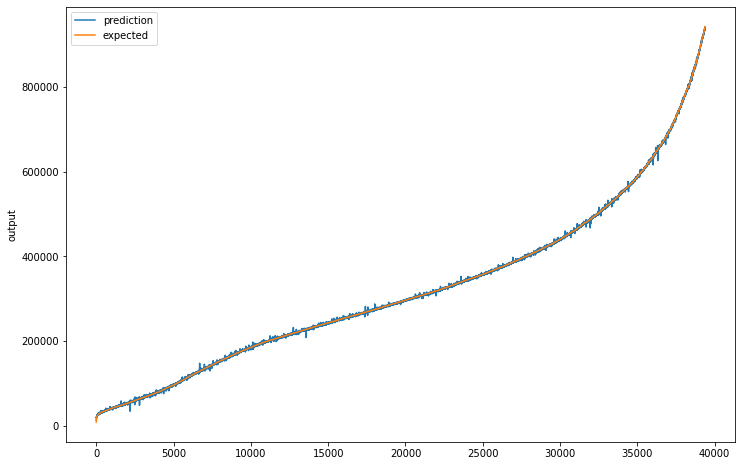

In [ ]:
chart_regression(predictions.flatten(),y_test)

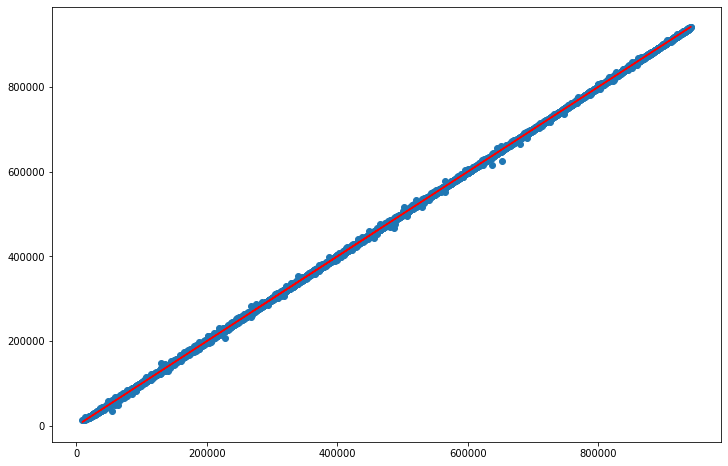

In [ ]:
plt.figure(figsize=(12,8))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
df.head()

,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet15,fullbathcnt,hashottuborspa,lotsizesquarefeet,poolcnt,pooltypeid10,pooltypeid7,rawcensustractandblock,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertycountylandusecode_014D,propertycountylandusecode_0200,propertycountylandusecode_0201,propertycountylandusecode_0202,propertycountylandusecode_0203,propertycountylandusecode_0204,propertycountylandusecode_0208,propertycountylandusecode_0209,propertycountylandusecode_020A,propertycountylandusecode_020C,propertycountylandusecode_020E,propertycountylandusecode_020G,propertycountylandusecode_020M,propertycountylandusecode_0210,propertycountylandusecode_0220,propertycountylandusecode_0230,propertycountylandusecode_0231,propertycountylandusecode_02G0,propertycountylandusecode_0300,propertycountylandusecode_0301,...,regionidzip_96478.0,regionidzip_96479.0,regionidzip_96480.0,regionidzip_96485.0,regionidzip_96486.0,regionidzip_96488.0,regionidzip_96489.0,regionidzip_96490.0,regionidzip_96492.0,regionidzip_96494.0,regionidzip_96496.0,regionidzip_96497.0,regionidzip_96505.0,regionidzip_96506.0,regionidzip_96507.0,regionidzip_96508.0,regionidzip_96510.0,regionidzip_96513.0,regionidzip_96514.0,regionidzip_96515.0,regionidzip_96517.0,regionidzip_96522.0,regionidzip_96523.0,regionidzip_96524.0,regionidzip_96525.0,regionidzip_96531.0,regionidzip_96533.0,regionidzip_97298.0,regionidzip_97316.0,regionidzip_97317.0,regionidzip_97318.0,regionidzip_97319.0,regionidzip_97323.0,regionidzip_97324.0,regionidzip_97328.0,regionidzip_97329.0,regionidzip_97330.0,regionidzip_97331.0,regionidzip_97344.0,regionidzip_399675.0
112063,0.0,2.0,4.0,2130.0,2130.0,2.0,0,6754.0,0.0,0.0,0.0,6.037195e+07,0.0,2.0,1941.0,327874.0,942640.0,2015.0,614766.0,7944.05,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147003,0.0,4.0,7.0,4282.0,4282.0,4.0,0,7036.0,0.0,0.0,0.0,6.037191e+07,0.0,4.0,1920.0,430335.0,942640.0,2015.0,512305.0,11819.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78960,0.0,2.0,4.0,2952.0,2952.0,2.0,0,4477.0,0.0,0.0,0.0,6.037192e+07,0.0,2.0,1923.0,502058.0,942640.0,2015.0,440582.0,11659.47,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12608,1.0,2.0,2.0,2540.0,2540.0,2.0,0,7666.0,0.0,0.0,0.0,6.037481e+07,0.0,2.0,1955.0,327874.0,942640.0,2015.0,614766.0,11525.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149284,0.0,2.0,4.0,2012.0,2012.0,2.0,0,2999.0,0.0,0.0,0.0,6.037621e+07,0.0,2.0,1938.0,175196.0,942501.0,2015.0,767305.0,10483.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
